# 데이터 상관관계 분석

# 상관분석과 상관계수
- 상관분석: 어떤 요소들의 관계가 어떤 관계를 가지고 있는지 성향을 분석하는 것
- 상관분석 결과를 산포도, 산점도 그래프로 그리면 직관적으로 두 변수간의 관계 파악 가능

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc, font_manager
import matplotlib
# 한글 처리를 위해 폰트 설정
fontname="C:/Windows/Fonts/gulim.ttc"
font_name=font_manager.FontProperties(fname=fontname).get_name()
matplotlib.rc('font',family=font_name)

# 그림 크기
plt.rcParams['figure.figsize']=(4,3)
# 마이너스 기호(-) 처리
plt.rcParams['axes.unicode_minus']=False

# 산포도 그래프 작성(키와 발크기)

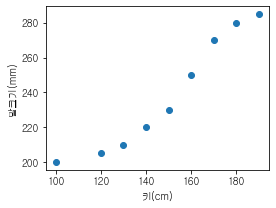

In [26]:
height=[100,120,130,140,150,160,170,180,190]
foot_size=[200,205,210,220,230,250,270,280,285]
plt.scatter(height,foot_size)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')
plt.show()

# 산포도 그래프 작성(산의 높이에 따른 기온 변화)

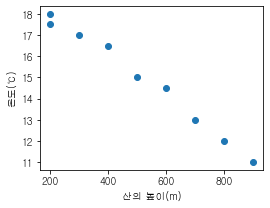

In [27]:
h=[200,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,14.5,13,12,11]
plt.scatter(h,t)
plt.xlabel('산의 높이(m)')
plt.ylabel('온도(℃)')
plt.show()

# 산포도 그래프 작성(상관관계가 없는 데이터)

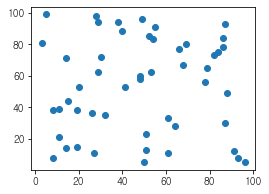

In [28]:
# randint(start,end,size(생성될 임의의 정수 갯수))
random_x=np.random.randint(0,100,50) 
random_y=np.random.randint(0,100,50)
plt.scatter(random_x,random_y)
plt.show()

0.966126323516351


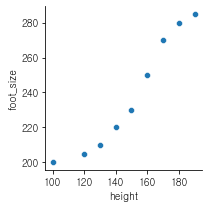

In [39]:
# seaborn으로 산포도 그래프 작성(relplot으로 그래프 생성할 때 dataFrame 작성 필요)
df=pd.DataFrame({'height':height,'foot_size':foot_size})
print(df.height.corr(df.foot_size)) # 키와 발크기 상관관계 출력
sns.relplot(x='height',y='foot_size',data=df,height=3)
plt.show()

-0.9932466837826042


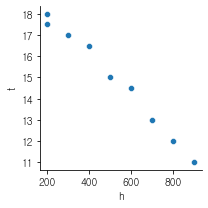

In [42]:
df=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))
sns.relplot(x='h',y='t',data=df,height=3)
plt.show()

0.02353277094882221


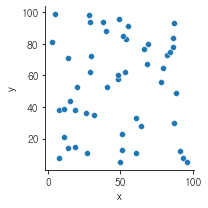

In [43]:
df=pd.DataFrame({'x':random_x,'y':random_y})
print(df.x.corr(df.y))
sns.relplot(x='x',y='y',data=df,height=3)
plt.show()